csv licensed cc0
https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('f1.db')

for name in ['circuits', 'constructor_results', 'constructor_standings', \
             'constructors', 'driver_standings', 'drivers', 'lap_times', \
             'pit_stops', 'qualifying', 'races', 'results', 'seasons', \
             'sprint_results', 'status']:
    df = pd.read_csv(f'{name}.csv')
    print(name, df.shape)
    df.to_sql(name, conn, if_exists='replace', index=False)

circuits (77, 9)
constructor_results (12625, 5)
constructor_standings (13391, 7)
constructors (212, 5)
driver_standings (34863, 7)
drivers (861, 9)
lap_times (589081, 6)
pit_stops (11371, 7)
qualifying (10494, 9)
races (1125, 18)
results (26759, 18)
seasons (75, 2)
sprint_results (360, 16)
status (139, 2)


In [2]:
df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
df

,name
0,circuits
1,constructor_results
2,constructor_standings
3,constructors
4,driver_standings
5,drivers
6,lap_times
7,pit_stops
8,qualifying
9,races


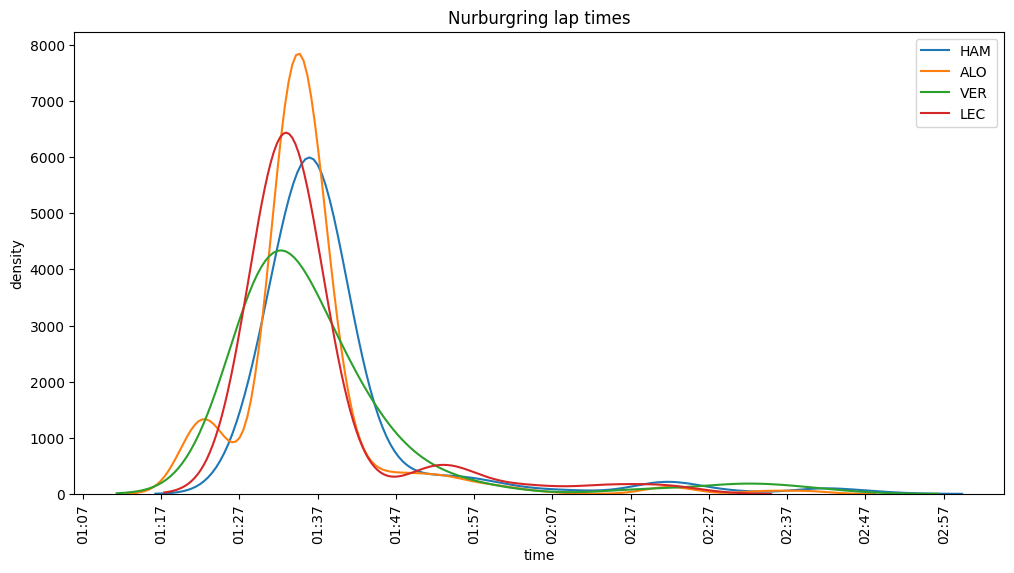

In [10]:
q = "SELECT milliseconds, code, nationality " \
    "FROM lap_times " \
    "INNER JOIN drivers ON lap_times.driverId = drivers.driverId " \
    "INNER JOIN races ON lap_times.raceId = races.raceId " \
    "INNER JOIN circuits ON races.circuitId = circuits.circuitId " \
    "WHERE circuits.circuitRef = 'nurburgring';"

df = pd.read_sql_query(q, conn)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = df[df.milliseconds != '\\N']
df.milliseconds = pd.to_numeric(df.milliseconds)
df = df[(df.milliseconds > 0) & (df.milliseconds < 200000)]
df = df[df["code"].isin(["LEC", "HAM", "VER", "ALO"])]
df['time'] = pd.to_datetime(df.milliseconds, unit='ms')
# print(df.head())

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
for code in df.code.unique():
    subset = df[df.code == code].time
    if subset.nunique() > 1:
        sns.kdeplot(subset, label=code)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
plt.legend()
plt.xlabel('time')
plt.xticks(rotation=90)
plt.ylabel('density')
plt.title('Nurburgring lap times')
plt.show()